In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 23.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


# New Section

In [ ]:
import statsmodels

statsmodels.__version__

'0.12.1'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/GoldmanSachsE.xlsx')

df.head()

,datetime,close,high,low,open,volume,adj close
0,2014-01-14,176.600006,48.799999,47.509998,48.777142,19740000,48.279999
1,2014-02-12,163.500000,48.367142,45.581429,47.857143,40432000,47.197144
2,2014-03-19,168.179993,47.695713,46.002857,46.915714,21135800,47.382858
3,2014-04-02,167.270004,47.831429,46.891430,47.438572,16417100,47.148571
4,2014-05-19,157.669998,47.495712,45.750000,47.461430,25220300,46.958572


In [ ]:
df = df.drop(['high','low','open','volume','adj close'],axis=1)

In [ ]:
df.isnull().sum()

datetime    0
close       0
dtype: int64

In [ ]:
df.drop_duplicates(keep='last', inplace=True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df.head()

,datetime,close
0,2014-01-14,176.600006
1,2014-02-12,163.500000
2,2014-03-19,168.179993
3,2014-04-02,167.270004
4,2014-05-19,157.669998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  84 non-null     datetime64[ns]
 1   close     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
df = df.set_index(['datetime'])

df.head()

,close
datetime,
2014-01-14,176.600006
2014-02-12,163.500000
2014-03-19,168.179993
2014-04-02,167.270004
2014-05-19,157.669998


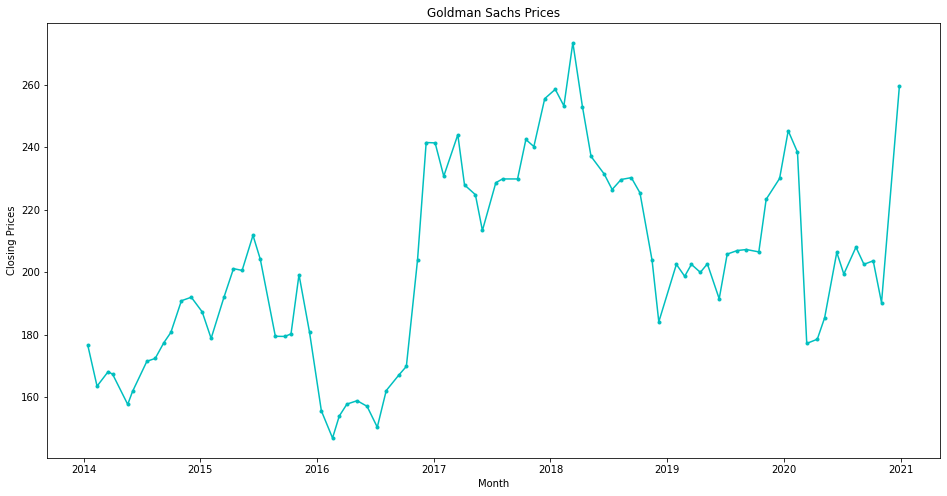

In [ ]:
plt.figure(figsize = (16, 8))

plt.xlabel("Month")

plt.ylabel("Closing Prices")

plt.title('Goldman Sachs Prices')

plt.plot(df.index, df.close, color = 'c', marker = '.')

In [ ]:
df_train = df.loc['2006-01-01' : '2015-12-01']

df_test = df.loc['2016-01-01' : '2017-12-01']

print(df_train)

print(df_test)

                 close
datetime              
2014-01-14  176.600006
2014-02-12  163.500000
2014-03-19  168.179993
2014-04-02  167.270004
2014-05-19  157.669998
2014-06-03  161.800003
2014-07-18  171.470001
2014-08-13  172.369995
2014-09-09  177.399994
2014-10-01  180.699997
2014-11-03  190.830002
2014-12-04  191.949997
2015-01-07  187.279999
2015-02-04  178.779999
2015-03-16  191.899994
2015-04-15  201.100006
2015-05-12  200.529999
2015-06-15  211.759995
2015-07-08  204.059998
2015-08-24  179.460007
2015-09-23  179.410004
2015-10-12  180.229996
2015-11-06  199.169998
                 close
datetime              
2016-01-15  155.610001
2016-02-19  146.910004
2016-03-11  153.940002
2016-04-04  157.770004
2016-05-06  158.850006
2016-06-06  157.059998
2016-07-08  150.380005
2016-08-05  162.089996
2016-09-13  167.000000
2016-10-07  169.830002
2016-11-11  203.940002
2016-12-08  241.449997
2017-01-05  241.320007
2017-02-01  230.669998
2017-03-17  243.940002
2017-04-07  227.880005
2017-05-11 

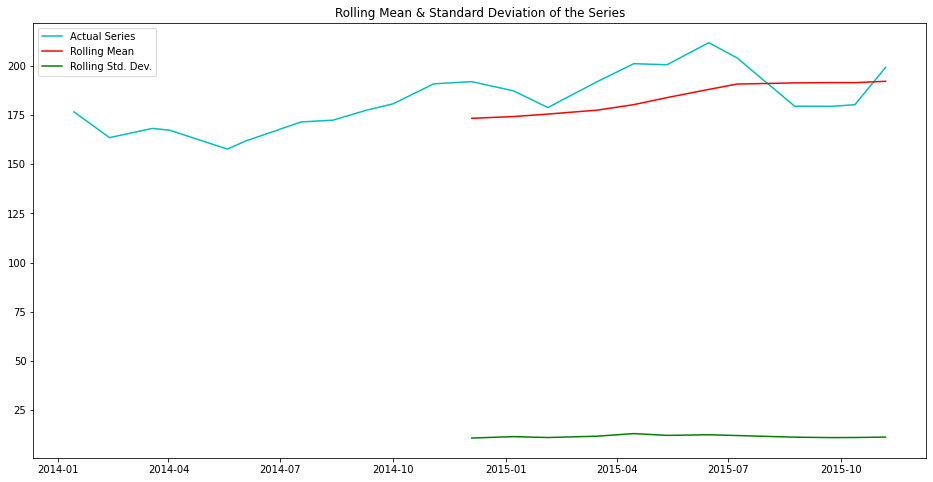

In [ ]:
rolmean = df_train.rolling(window = 12).mean()

rolstd = df_train.rolling(window = 12).std()

plt.figure(figsize = (16, 8))

actual = plt.plot(df_train, color = 'c', label = 'Actual Series')

rollingmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')

rollingstd = plt.plot(rolstd, color = 'green', label = 'Rolling Std. Dev.')

plt.title('Rolling Mean & Standard Deviation of the Series')

plt.legend()

plt.show()

In [ ]:
def adfuller(df_train):

    from statsmodels.tsa.stattools import adfuller

    print('Dickey-Fuller Test:')

    adftest = adfuller(df_train['close'])

    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])

    for key,value in adftest[4].items():

        adfoutput['Critical Value (%s)'%key] = value

    print(adfoutput)

adfuller(df_train)

Dickey-Fuller Test:
Test Statistic          -5.172841
p-value                  0.000010
Lags Used                9.000000
No. of Observations     13.000000
Critical Value (1%)     -4.068854
Critical Value (5%)     -3.127149
Critical Value (10%)    -2.701730
dtype: float64


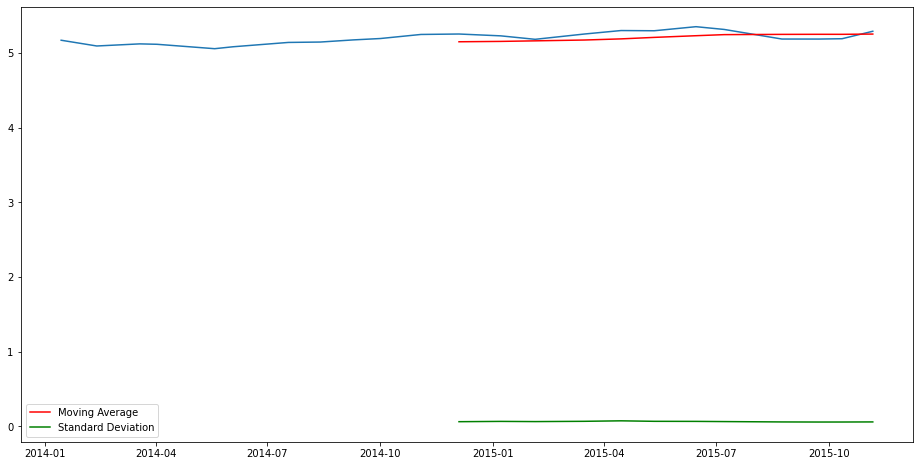

In [ ]:
plt.figure(figsize = (16, 8))

df_log = np.log(df_train)

MAvg = df_log.rolling(window = 12).mean()

MStd = df_log.rolling(window = 12).std()

plt.plot(df_log)

plt.plot(MAvg, color = 'r', label = 'Moving Average')

plt.plot(MStd, color = 'g', label = 'Standard Deviation')

plt.legend()

plt.show()

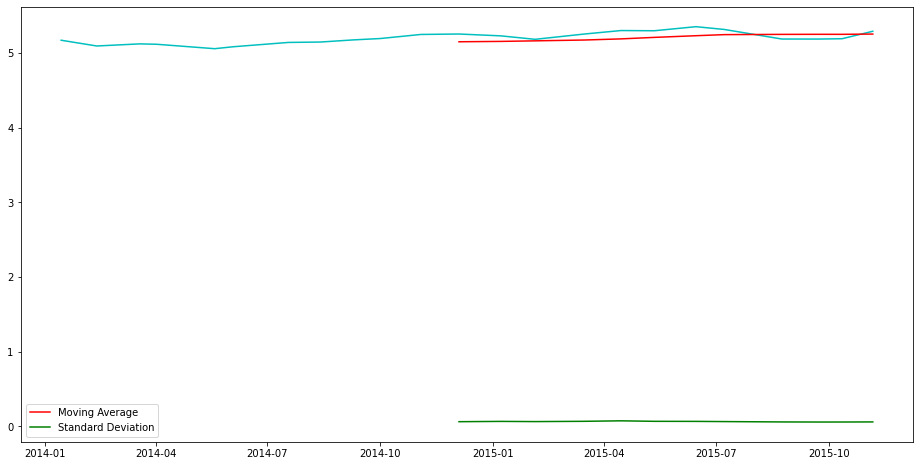

In [ ]:
plt.figure(figsize = (16, 8))

df_shift = df_log - df_log.shift(periods = 1)

MAvg_shift = df_log.rolling(window=12).mean()

MStd_shift = df_log.rolling(window=12).std()

plt.plot(df_log , color = 'c')

plt.plot(MAvg_shift , color = 'red', label = 'Moving Average')

plt.plot(MStd_shift , color = 'green', label = 'Standard Deviation')

plt.legend()

plt.show()

df_shift = df_shift.dropna()

In [ ]:
adfuller(df_shift)

Dickey-Fuller Test:
Test Statistic          -0.351823
p-value                  0.917837
Lags Used                9.000000
No. of Observations     12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


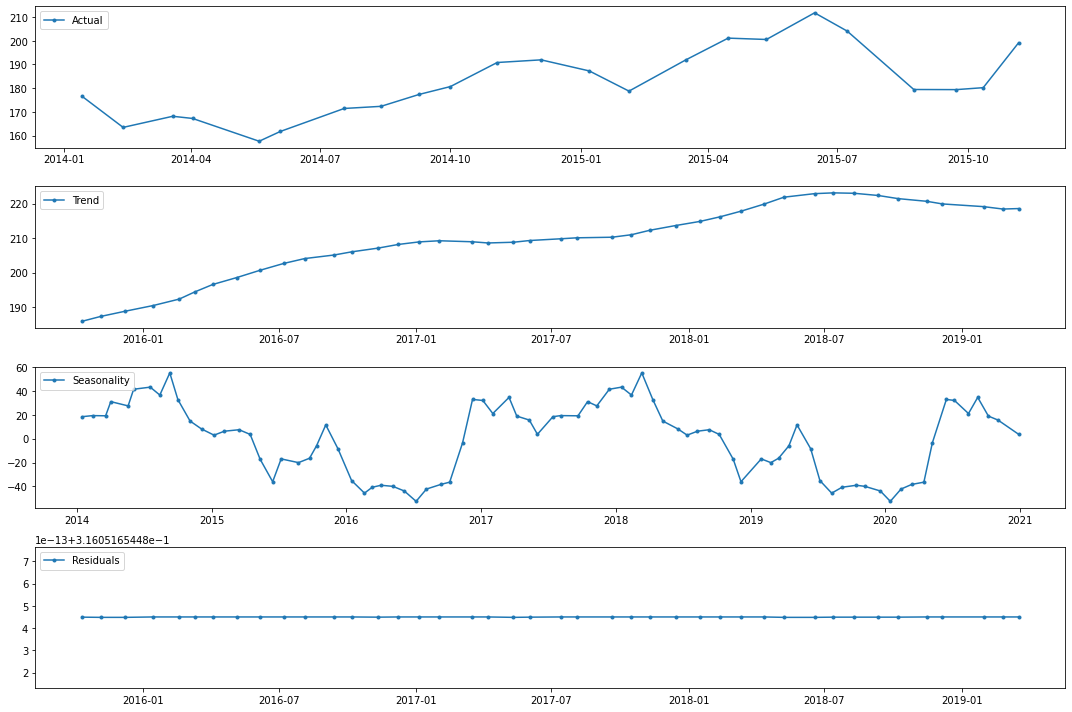

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df, model = 'additive', period = int(len(df)/2))

trend = decomp.trend

seasonal = decomp.seasonal

residual = decomp.resid

plt.figure(figsize = (15, 10))

plt.subplot(411)
plt.plot(df_train, label = 'Actual', marker = '.')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(trend, label = 'Trend', marker = '.')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', marker = '.')
plt.legend(loc = 'upper left')

plt.subplot(414)
plt.plot(residual, label = 'Residuals', marker = '.')
plt.legend(loc = 'upper left')

plt.tight_layout()

<Figure size 1152x576 with 0 Axes>

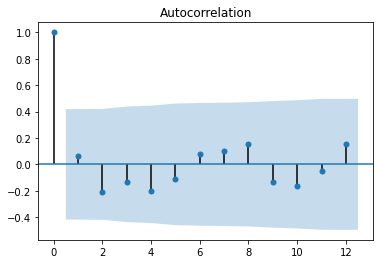

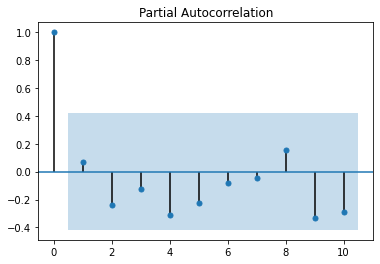

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16, 8))

plot_acf(df_shift, lags = 12)

plt.show()

plot_pacf(df_shift, lags = 10)

plt.show()

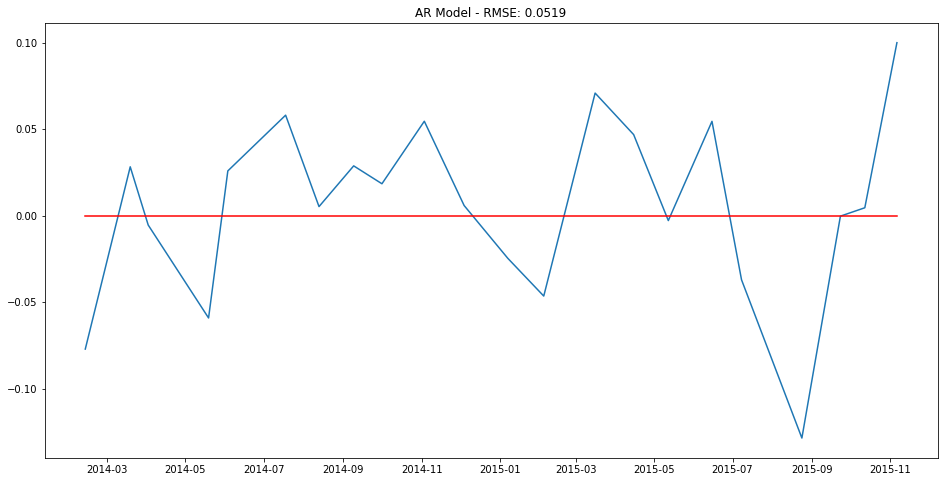

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize = (16, 8))

model_AR = AutoReg(df_shift, lags = 1)

results_AR = model_AR.fit()

plt.plot(df_shift)

predict = results_AR.predict(start = 0, end = len(df_shift) - 1)

predict = predict.fillna(0)

plt.plot(predict , color = 'red')

plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict, df_shift['close'], squared = False))

plt.show()

In [ ]:
AR_RMSE = mean_squared_error(predict, df_shift['close'], squared = False)
AR_RMSE

0.05193145946608054

In [ ]:
results_AR.aic

-5.730757453413123

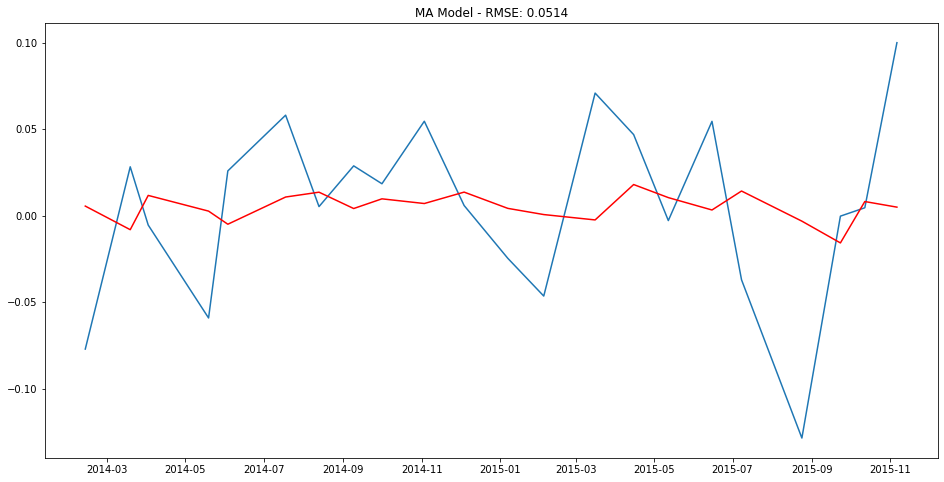

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize = (16, 8))

model_MA = ARIMA(df_shift, order =(0,0,1))

results_MA = model_MA.fit(disp=0)

plt.plot(df_shift)

plt.plot(results_MA.fittedvalues, color = 'red')

plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues, df_shift['close'], squared = False))

plt.show()

In [ ]:
MA_RMSE = mean_squared_error(results_MA.fittedvalues, df_shift['close'], squared = False)
MA_RMSE

0.05141513860097161

In [ ]:
results_MA.aic

-62.19453177270975

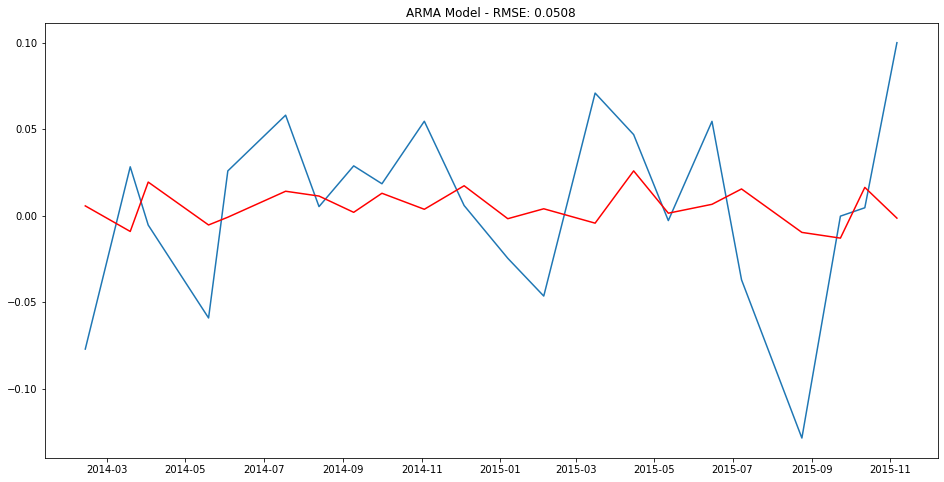

In [ ]:
plt.figure(figsize = (16, 8))

model_ARMA = ARIMA(df_shift, order=(1,0,1))

results_ARMA = model_ARMA.fit()

plt.plot(df_shift)

plt.plot(results_ARMA.fittedvalues, color = 'red')

plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift['close'], squared = False))

plt.show()

In [ ]:
ARMA_RMSE = mean_squared_error(results_ARMA.fittedvalues, df_shift['close'], squared = False)
ARMA_RMSE

0.05080963825652354

In [ ]:
results_ARMA.aic

-60.73993648939424

In [ ]:
df_shift2 = df_log - df_log.shift(periods = 2)

df_shift2.dropna(inplace=True)

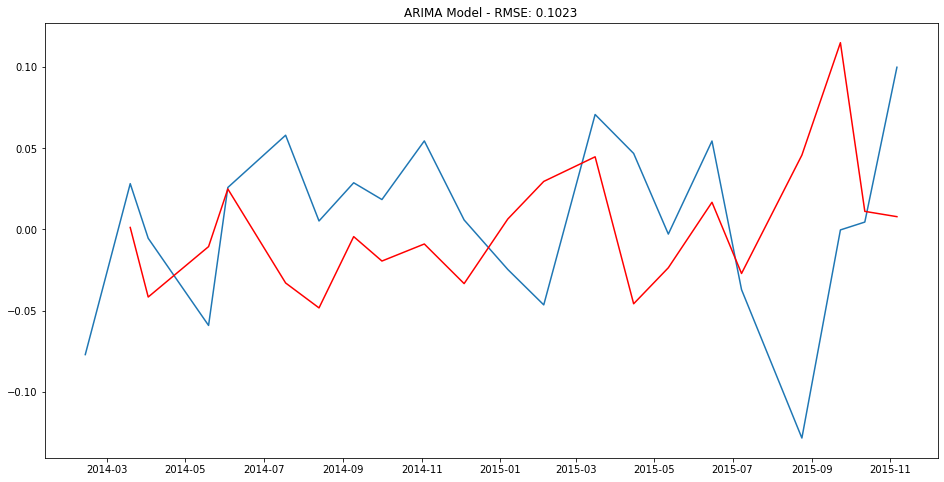

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize = (16, 8))

model_ARIMA = ARIMA(df_shift, order=(1,1,1))

results_ARIMA = model_ARIMA.fit(disp=0)

plt.plot(df_shift)

plt.plot(results_ARIMA.fittedvalues, color = 'red')

plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, df_shift2['close'], squared = False))

plt.show()

In [ ]:
ARIMA_RMSE = mean_squared_error(results_ARIMA.fittedvalues, df_shift2['close'], squared = False)
ARIMA_RMSE

0.10225939549277833

In [ ]:
results_ARIMA.aic

-53.47683116535546

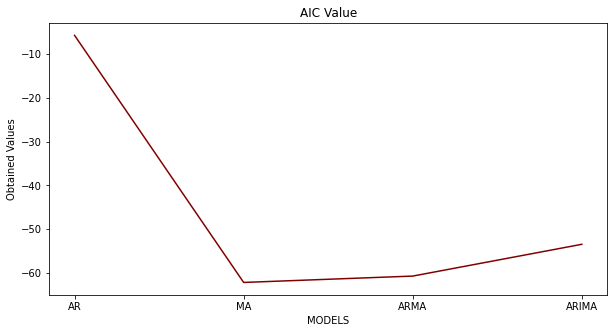

In [ ]:
data = {'AR': results_AR.aic, 'MA': results_MA.aic, 'ARMA': results_ARMA.aic, 'ARIMA': results_ARIMA.aic}
x_label1 = list(data.keys())
y_label1 = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(x_label1, y_label1, color ='maroon',width = 0.4)
plt.xlabel("MODELS")
plt.ylabel("Obtained Values")
plt.title("AIC Value")
plt.show()

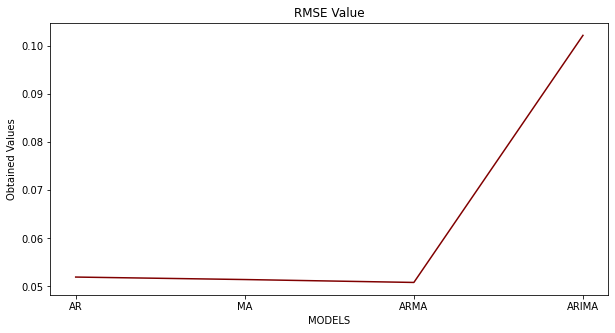

In [ ]:
data1 = {'AR': AR_RMSE, 'MA': MA_RMSE, 'ARMA': ARMA_RMSE, 'ARIMA': ARIMA_RMSE}
x_label2 = list(data1.keys())
y_label2 = list(data1.values())

fig = plt.figure(figsize = (10, 5))

plt.plot(x_label2, y_label2, color ='maroon')
plt.xlabel("MODELS")
plt.ylabel("Obtained Values")
plt.title("RMSE Value")
plt.show()

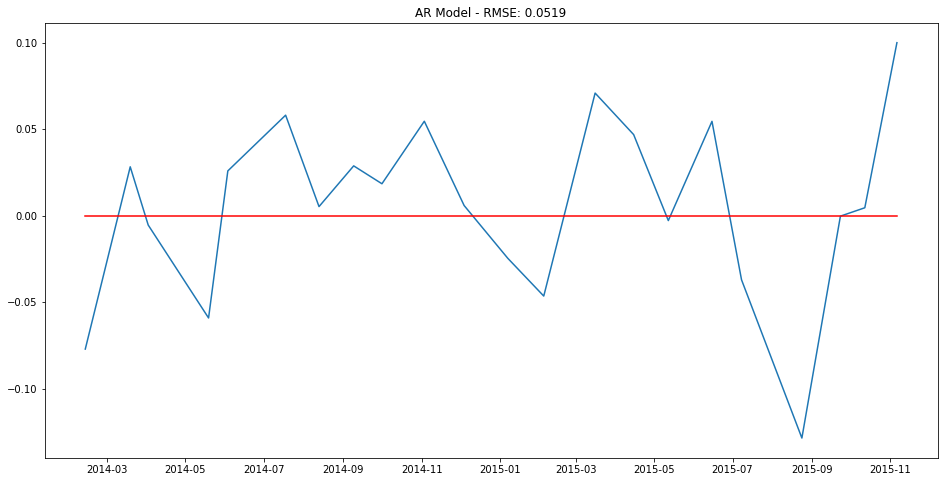

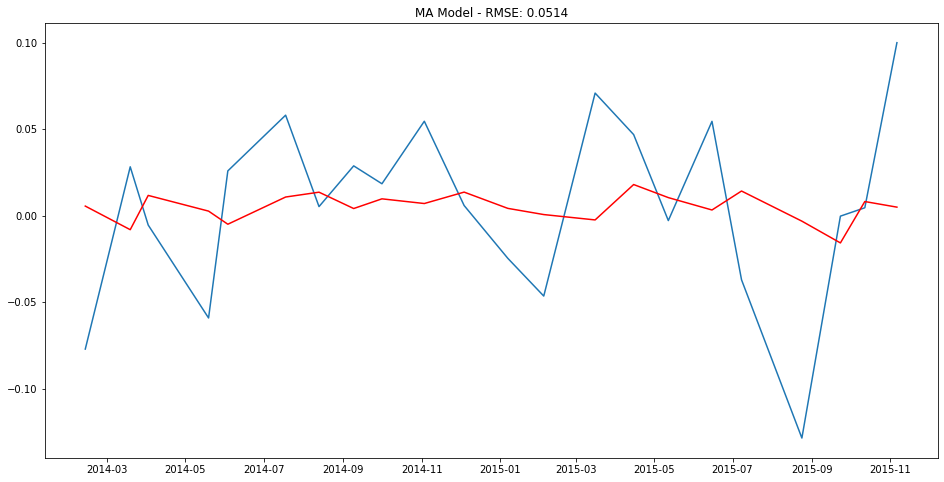

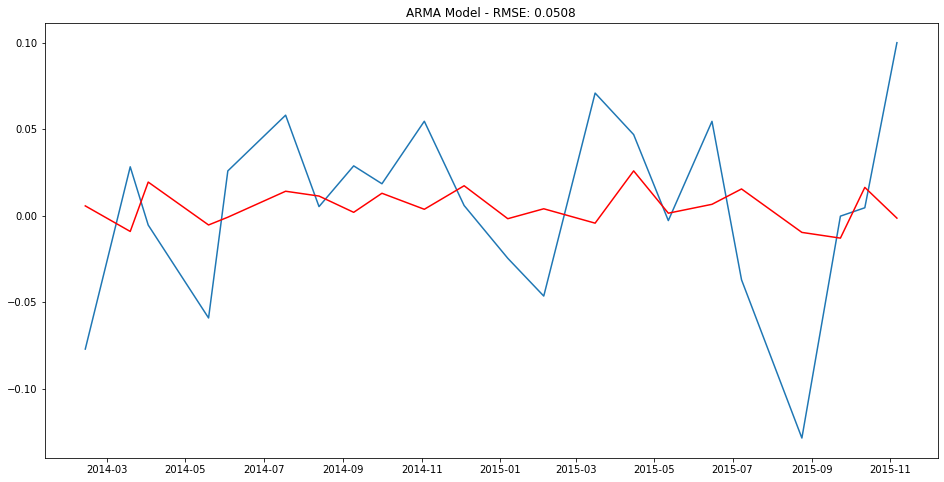

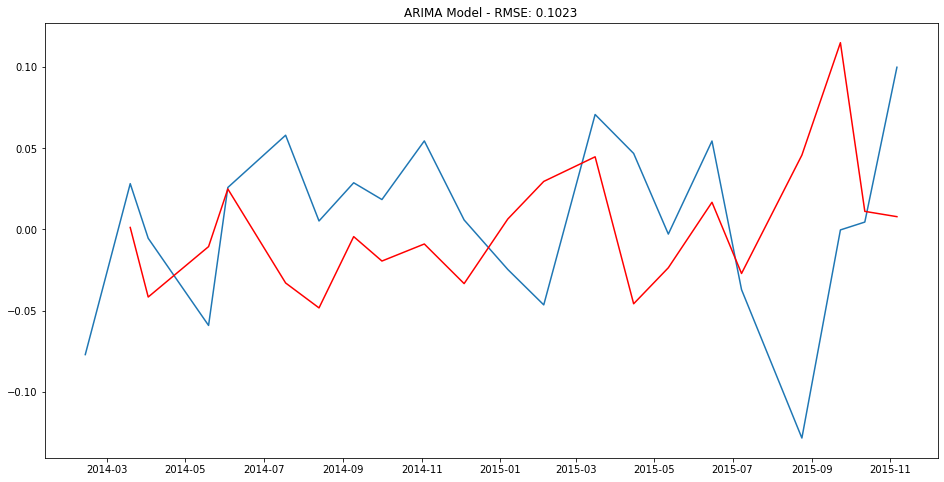

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize = (16, 8))

model_AR = AutoReg(df_shift, lags = 1)

results_AR = model_AR.fit()

plt.plot(df_shift)

predict = results_AR.predict(start = 0, end = len(df_shift) - 1)

predict = predict.fillna(0)

plt.plot(predict , color = 'red')

plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict, df_shift['close'], squared = False))

# plt.show()

from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize = (16, 8))

model_MA = ARIMA(df_shift, order =(0,0,1))

results_MA = model_MA.fit(disp=0)

plt.plot(df_shift)

plt.plot(results_MA.fittedvalues, color = 'red')

plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues, df_shift['close'], squared = False))

plt.show()

plt.figure(figsize = (16, 8))

model_ARMA = ARIMA(df_shift, order=(1,0,1))

results_ARMA = model_ARMA.fit()

plt.plot(df_shift)

plt.plot(results_ARMA.fittedvalues, color = 'red')

plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift['close'], squared = False))

plt.show()

from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize = (16, 8))

model_ARIMA = ARIMA(df_shift, order=(1,1,1))

results_ARIMA = model_ARIMA.fit(disp=0)

plt.plot(df_shift)

plt.plot(results_ARIMA.fittedvalues, color = 'red')

plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, df_shift2['close'], squared = False))

plt.show()

In [ ]:
predictions = pd.Series(results_ARMA.fittedvalues)

predictions

datetime
2014-02-12    0.005649
2014-03-19   -0.009124
2014-04-02    0.019401
2014-05-19   -0.005377
2014-06-03   -0.000895
2014-07-18    0.014104
2014-08-13    0.011325
2014-09-09    0.001924
2014-10-01    0.012936
2014-11-03    0.003689
2014-12-04    0.017273
2015-01-07   -0.001758
2015-02-04    0.003975
2015-03-16   -0.004326
2015-04-15    0.025861
2015-05-12    0.001427
2015-06-15    0.006555
2015-07-08    0.015425
2015-08-24   -0.009669
2015-09-23   -0.012972
2015-10-12    0.016327
2015-11-06   -0.001425
dtype: float64

In [ ]:
predictions_cumsum = predictions.cumsum() # Use .cumsum fuction on the predictions

predictions_cumsum

datetime
2014-02-12    0.005649
2014-03-19   -0.003475
2014-04-02    0.015926
2014-05-19    0.010549
2014-06-03    0.009654
2014-07-18    0.023758
2014-08-13    0.035083
2014-09-09    0.037007
2014-10-01    0.049943
2014-11-03    0.053633
2014-12-04    0.070906
2015-01-07    0.069148
2015-02-04    0.073123
2015-03-16    0.068798
2015-04-15    0.094659
2015-05-12    0.096086
2015-06-15    0.102641
2015-07-08    0.118066
2015-08-24    0.108397
2015-09-23    0.095425
2015-10-12    0.111752
2015-11-06    0.110327
dtype: float64

In [ ]:
predictions_log = pd.Series(df_log['close'].iloc[0], index = df_log.index)

predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

predictions_log

datetime
2014-01-14    5.173887
2014-02-12    5.179536
2014-03-19    5.170413
2014-04-02    5.189814
2014-05-19    5.184437
2014-06-03    5.183542
2014-07-18    5.197645
2014-08-13    5.208970
2014-09-09    5.210895
2014-10-01    5.223831
2014-11-03    5.227520
2014-12-04    5.244793
2015-01-07    5.243035
2015-02-04    5.247011
2015-03-16    5.242685
2015-04-15    5.268546
2015-05-12    5.269973
2015-06-15    5.276528
2015-07-08    5.291953
2015-08-24    5.282285
2015-09-23    5.269313
2015-10-12    5.285639
2015-11-06    5.284214
dtype: float64

In [ ]:
predictions_ARMA = np.exp(predictions_log)

predictions_ARMA

datetime
2014-01-14    176.600006
2014-02-12    177.600453
2014-03-19    175.987419
2014-04-02    179.435104
2014-05-19    178.472865
2014-06-03    178.313216
2014-07-18    180.845897
2014-08-13    182.905619
2014-09-09    183.257947
2014-10-01    185.643973
2014-11-03    186.330100
2014-12-04    189.576555
2015-01-07    189.243606
2015-02-04    189.997437
2015-03-16    189.177330
2015-04-15    194.133504
2015-05-12    194.410722
2015-06-15    195.689317
2015-07-08    198.731231
2015-08-24    196.819031
2015-09-23    194.282352
2015-10-12    197.480350
2015-11-06    197.199109
dtype: float64

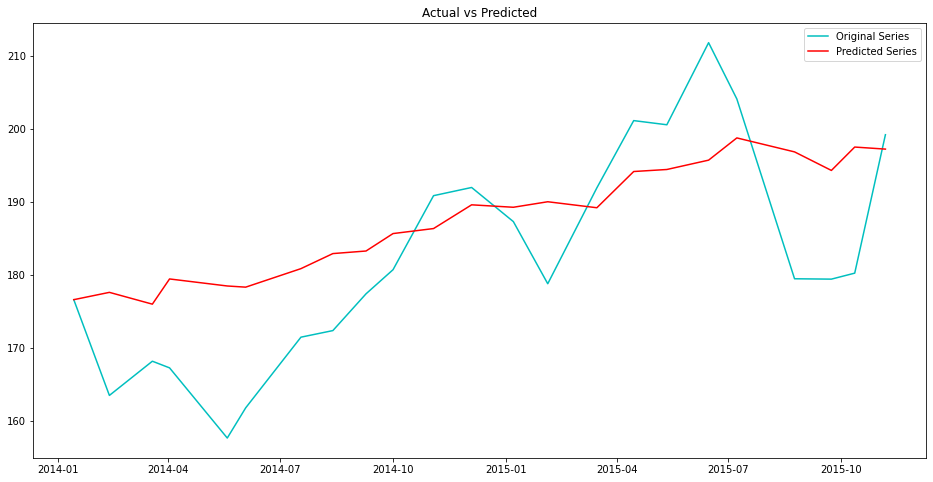

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(df_train, color = 'c', label = 'Original Series')

plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

In [ ]:
forecasted_ARMA = results_ARMA.forecast(steps = 24)[0]

forecasted_ARMA

array([ 0.03017437, -0.00486878,  0.0101597 ,  0.00371464,  0.00647864,
        0.00529328,  0.00580163,  0.00558362,  0.00567712,  0.00563702,
        0.00565422,  0.00564684,  0.00565001,  0.00564865,  0.00564923,
        0.00564898,  0.00564909,  0.00564904,  0.00564906,  0.00564906,
        0.00564906,  0.00564906,  0.00564906,  0.00564906])

In [ ]:
forecasted_ARMA_cumsum = forecasted_ARMA.cumsum()

forecasted_ARMA_cumsum

array([0.03017437, 0.0253056 , 0.03546529, 0.03917993, 0.04565858,
       0.05095186, 0.0567535 , 0.06233712, 0.06801424, 0.07365126,
       0.07930548, 0.08495233, 0.09060233, 0.09625098, 0.10190022,
       0.1075492 , 0.11319829, 0.11884733, 0.1244964 , 0.13014545,
       0.13579451, 0.14144357, 0.14709263, 0.15274168])

In [ ]:
index = pd.date_range('01-01-2016','01-01-2018', freq = '1M') - pd.offsets.MonthBegin(1)

forecasted_log = pd.Series(df_log['close'].iloc[-1], index = index)

forecasted_log = forecasted_log.add(forecasted_ARMA_cumsum, fill_value = 0)

forecasted_log

2016-01-01    5.324333
2016-02-01    5.319464
2016-03-01    5.329624
2016-04-01    5.333339
2016-05-01    5.339817
2016-06-01    5.345111
2016-07-01    5.350912
2016-08-01    5.356496
2016-09-01    5.362173
2016-10-01    5.367810
2016-11-01    5.373464
2016-12-01    5.379111
2017-01-01    5.384761
2017-02-01    5.390410
2017-03-01    5.396059
2017-04-01    5.401708
2017-05-01    5.407357
2017-06-01    5.413006
2017-07-01    5.418655
2017-08-01    5.424304
2017-09-01    5.429953
2017-10-01    5.435602
2017-11-01    5.441251
2017-12-01    5.446900
dtype: float64

In [ ]:
forecasted_ARMA = np.exp(forecasted_log)

forecasted_ARMA

2016-01-01    205.271418
2016-02-01    204.274426
2016-03-01    206.360371
2016-04-01    207.128351
2016-05-01    208.474619
2016-06-01    209.581060
2016-07-01    210.800506
2016-08-01    211.980829
2016-09-01    213.187692
2016-10-01    214.392830
2016-11-01    215.608487
2016-12-01    216.829439
2017-01-01    218.057994
2017-02-01    219.293213
2017-03-01    220.535557
2017-04-01    221.784884
2017-05-01    223.041312
2017-06-01    224.304848
2017-07-01    225.575546
2017-08-01    226.853441
2017-09-01    228.138576
2017-10-01    229.430990
2017-11-01    230.730727
2017-12-01    232.037827
dtype: float64

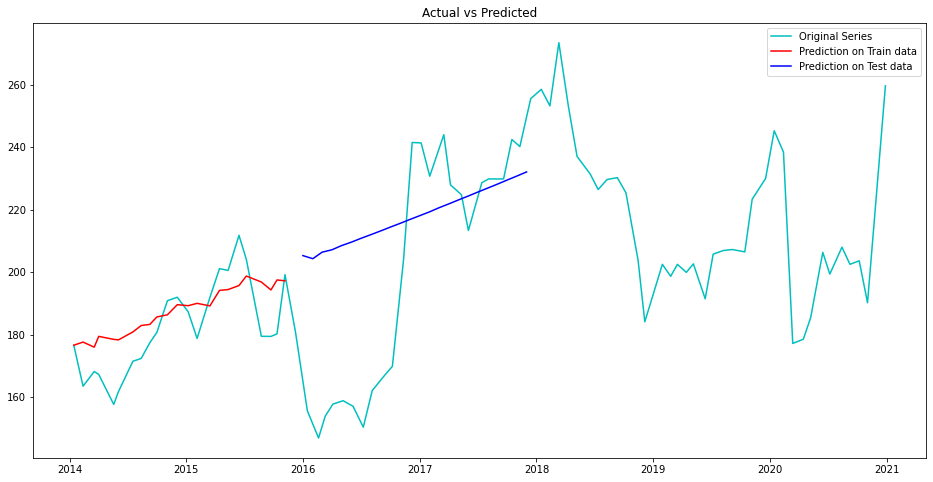

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(df, color = 'c', label = 'Original Series')

plt.plot(predictions_ARMA, color = 'r', label = 'Prediction on Train data') # Plot the predictions_ARMA series

plt.plot(forecasted_ARMA, label = 'Prediction on Test data', color = 'b')  # Plot the forecasted_ARMA series

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(predictions_ARMA,df_train) # Calculate RMSE using the predictions_ARMA and df_train

error

118.71664048865956

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(predictions_ARMA,df_test)
# Calculate RMSE using the forecasted_ARMA and df_test

error

1082.1980865019289